<a href="https://colab.research.google.com/github/abhishek09827/GDP_analysis/blob/main/India_Climate_Change_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
temp_detail = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
gdp = pd.read_csv('/content/India_GDP_Historical_Data.csv')
weather_quality = pd.read_csv('/content/delhi_aqi.csv')

## Feature 1 - Mean Temperature

In [ ]:

mean_temp = temp_detail.copy()
mean_temp = mean_temp[['date','meantemp','humidity']]

In [ ]:

mean_temp[['Year','Month','Rest']] = mean_temp['date'].str.split('-',n=3,expand=True)
mean_temp = mean_temp[['Rest','Month','Year','meantemp','humidity']]

In [ ]:

mean_temp_daily = mean_temp[['Year','meantemp','humidity']
]
mean_temp_daily = mean_temp_daily.groupby(['Year'])['meantemp'].mean().reset_index()

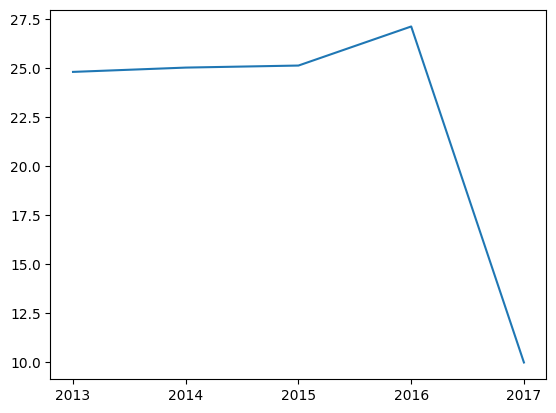

In [ ]:
plt.plot(mean_temp_daily['Year'], mean_temp_daily['meantemp'])

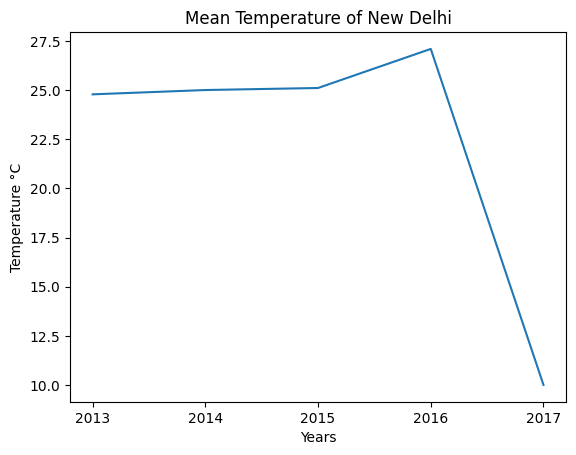

In [ ]:
plt.title('Mean Temperature of New Delhi')

plt.plot(mean_temp_daily['Year'], mean_temp_daily['meantemp'])

plt.xlabel('Years')
plt.ylabel('Temperature °C')

plt.show()

In [ ]:
mean_temp_daily.rename({'tempC':'Mean_Temp'}, axis=1, inplace=True)

In [ ]:
mean_temp_daily = mean_temp_daily.reset_index(drop=True)

## Feature 2 - Summer Mean Temp.

In [ ]:

summer_mean_temp = mean_temp.groupby(['Rest','Month','Year'])['meantemp'].mean().reset_index()
summer_mean_temp = summer_mean_temp.sort_values(['Year','Month','Rest'],ascending=[True,True,True])
summer_mean_temp.reset_index(inplace=True)
summer_mean_temp.drop(columns=['index'],inplace=True)

In [ ]:

summer_mean_temp['Day'] = summer_mean_temp['Rest'].astype(int)
summer_mean_temp['Month'] = summer_mean_temp['Month'].astype(int)
summer_mean_temp['Year'] = summer_mean_temp['Year'].astype(str)

In [ ]:

summer_mean_temp =  summer_mean_temp[(summer_mean_temp['Month'] == 6) |
                                     (summer_mean_temp['Month'] == 7) |
                                     (summer_mean_temp['Month'] == 8) ]

In [ ]:


summer_mean_temp = summer_mean_temp.groupby(['Year'])['meantemp'].mean().reset_index()
summer_mean_temp.reset_index(inplace=True)
summer_mean_temp.drop(columns=['index'],inplace=True)

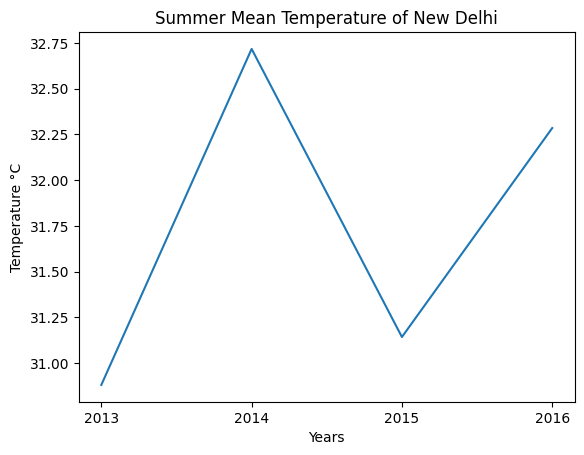

In [ ]:
plt.title('Summer Mean Temperature of New Delhi')

plt.plot(summer_mean_temp['Year'], summer_mean_temp['meantemp'])

plt.xlabel('Years')
plt.ylabel('Temperature °C')

plt.show()

In [ ]:
summer_mean_temp.rename({'tempC':'Summer_Mean_Temp'}, axis=1, inplace=True)

In [ ]:

summer_mean_temp_after = {'Year':[2018],'Summer_Mean_Temp':[np.nan]}
summer_mean_temp_after = pd.DataFrame(summer_mean_temp_after)

In [ ]:

summer_mean_temp = pd.concat([summer_mean_temp,summer_mean_temp_after])
summer_mean_temp = summer_mean_temp.ffill(axis ='rows')

In [ ]:
summer_mean_temp = summer_mean_temp.reset_index(drop=True)
summer_mean_temp['Year'] = summer_mean_temp['Year'].astype(str)

## Feature 3 - Extremely Hot Days

In [ ]:

ext_hot_days = mean_temp.groupby(['Rest','Month','Year'])['meantemp'].mean().reset_index()
ext_hot_days = ext_hot_days.sort_values(['Year','Month','Rest'],ascending=[True,True,True])
ext_hot_days.reset_index(inplace=True)
ext_hot_days.drop(columns=['index'],inplace=True)

In [ ]:

ext_hot_days['Number_of_Hot_Days'] = ext_hot_days['meantemp'].apply(lambda x: 1 if x >= 30 else 0)
ext_hot_days = ext_hot_days[ext_hot_days['Number_of_Hot_Days'] == 1]
ext_hot_days = ext_hot_days.groupby(['Year'])['Number_of_Hot_Days'].count().reset_index()

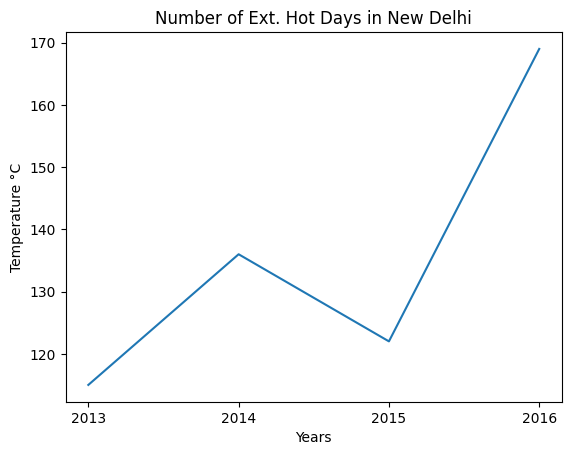

In [ ]:
plt.title('Number of Ext. Hot Days in New Delhi')

plt.plot(ext_hot_days['Year'], ext_hot_days['Number_of_Hot_Days'])

plt.xlabel('Years')
plt.ylabel('Temperature °C')

plt.show()

In [ ]:

ext_hot_days_after = {'Year':[2020],'Number_of_Hot_Days':[np.nan]}
ext_hot_days_after = pd.DataFrame(ext_hot_days_after)

In [ ]:

ext_hot_days = pd.concat([ext_hot_days,ext_hot_days_after])
ext_hot_days = ext_hot_days.ffill(axis ='rows')

In [ ]:
ext_hot_days = ext_hot_days.reset_index(drop=True)
ext_hot_days['Year'] = ext_hot_days['Year'].astype(str)

# Feature 4 - Max Daily Temp

In [ ]:

max_daily_temp = mean_temp.groupby(['Rest','Month','Year'])['meantemp'].mean().reset_index()
max_daily_temp = max_daily_temp.sort_values(['Year','Month','Rest'],ascending=[True,True,True])
max_daily_temp.reset_index(inplace=True)
max_daily_temp.drop(columns=['index'],inplace=True)

In [ ]:
# Taken Max temp. for each year
max_daily_temp = max_daily_temp.groupby(['Year'])['meantemp'].apply(lambda x: x.max()).reset_index()

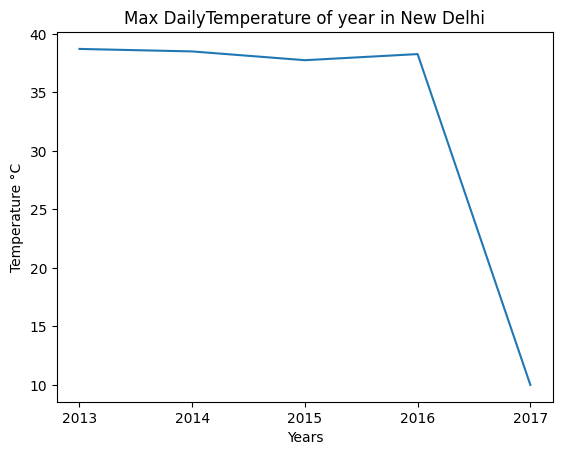

In [ ]:
plt.title('Max DailyTemperature of year in New Delhi')

plt.plot(max_daily_temp['Year'], max_daily_temp['meantemp'])

plt.xlabel('Years')
plt.ylabel('Temperature °C')


#plt.legend(loc="upper left")
plt.show()

In [ ]:
max_daily_temp.rename({'tempC':'Max_Daily_Temp'}, axis=1, inplace=True)

In [ ]:
max_daily_temp = max_daily_temp.reset_index(drop=True)

# Feature 13 - Mean Humidity

In [ ]:

mean_humidity = mean_temp.groupby(['Rest','Month','Year'])['humidity'].mean().reset_index()
mean_humidity = mean_humidity.sort_values(['Year','Month','Rest'],ascending=[True,True,True])
mean_humidity.reset_index(inplace=True)
mean_humidity.drop(columns=['index'],inplace=True)

In [ ]:

mean_humidity = mean_humidity[['Year','humidity']]
mean_humidity = mean_humidity.groupby(['Year'])['humidity'].mean().reset_index()

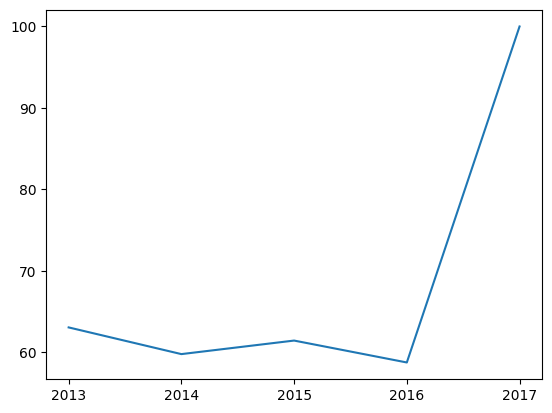

In [ ]:
plt.plot(mean_humidity['Year'], mean_humidity['humidity'])

In [ ]:
mean_humidity = mean_humidity.reset_index(drop=True)

# Feature 15 - GDP

In [ ]:

gdp_before = {'Year':[1961,2021],'gdp':[np.nan,np.nan]}
gdp_before = pd.DataFrame(gdp_before)

In [ ]:

gdp = pd.concat([gdp_before,gdp])

In [ ]:

gdp = gdp.bfill(axis ='rows')

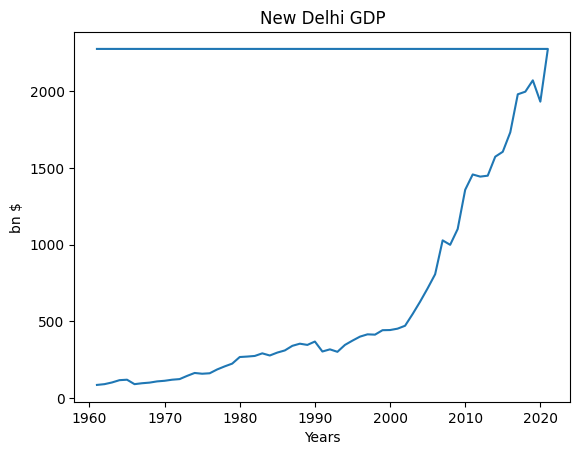

In [ ]:
plt.title('New Delhi GDP')

plt.plot(gdp['Year'], gdp['Per Capita in USD'])

plt.xlabel('Years')
plt.ylabel('bn $')

#plt.legend(loc="upper left")
plt.show()

In [ ]:
gdp = gdp.reset_index(drop=True)

# Feature 16 - Weather Quality

In [ ]:
weather_quality[['Year','Month-Date']] = weather_quality['date'].str.split('-',n=1,expand=True)

In [ ]:
weather_quality = weather_quality[['Year','pm2_5']]

In [ ]:
weather_quality = weather_quality.groupby(['Year'])['pm2_5'].mean().reset_index()

In [ ]:

weather_before = {'Year':[2009,2010,2011,2012,2013,2014]}
weather_before = pd.DataFrame(weather_before)

In [ ]:
weather_quality = pd.concat([weather_before,weather_quality])
weather_quality = weather_quality.bfill(axis ='rows')

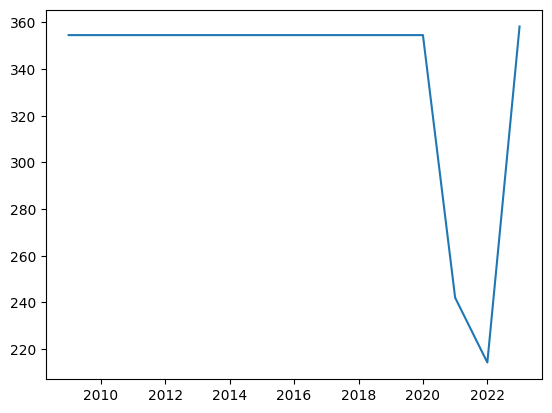

In [ ]:
plt.plot(weather_quality['Year'], weather_quality['pm2_5'])

In [ ]:
weather_quality.rename({'AQI':'Weather Quality'}, axis=1, inplace=True)

In [ ]:
weather_quality = weather_quality.reset_index(drop=True)

# GDP analysis


In [ ]:
data=pd.read_excel('/content/India GDP analysis.xlsx')
data

,Year,GDP Growth rate(%),Unemployment rate,FDI as % of GDP,Inflation Rate(%)
0,2005,7.92,18.10,0.886101,4.25
1,2006,8.06,18.07,2.130168,5.80
2,2007,7.66,18.11,2.073396,6.37
3,2008,3.09,18.50,3.620522,8.35
4,2009,7.86,18.94,2.651593,10.88
5,2010,8.50,19.47,1.635034,11.99
6,2011,5.24,19.66,2.002066,8.91
7,2012,5.46,20.17,1.312934,9.48
8,2013,6.39,20.68,1.516276,10.02
9,2014,7.41,21.22,1.695659,6.67


In [ ]:
data.describe()

,Year,GDP Growth rate(%),Unemployment rate,FDI as % of GDP,Inflation Rate(%)
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2012.500000,5.890000,20.635625,1.926175,6.887500
std,4.760952,3.701322,2.093071,0.623124,2.735472
min,2005.000000,-6.600000,18.070000,0.886101,3.330000
25%,2008.750000,5.405000,18.830000,1.547730,4.745000
50%,2012.500000,7.105000,20.425000,1.862372,6.495000
75%,2016.250000,7.940000,22.325000,2.101629,9.052500
max,2020.000000,8.500000,24.900000,3.620522,11.990000


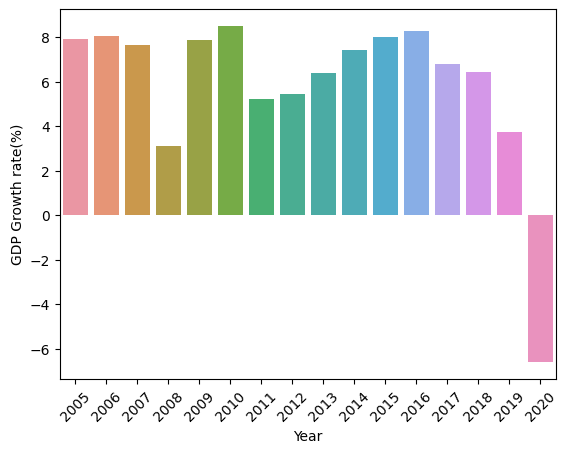

In [ ]:
sns.barplot(x='Year', y='GDP Growth rate(%)',data=data)
plt.xticks(rotation=45)
plt.show()

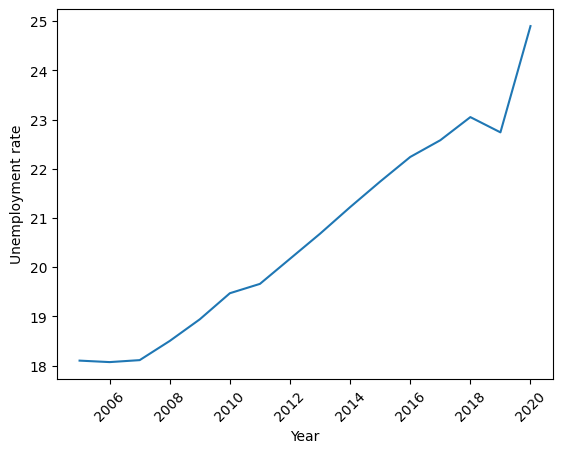

In [ ]:
sns.lineplot(x='Year',y='Unemployment rate',data=data)
plt.xticks(rotation=45)
plt.show()

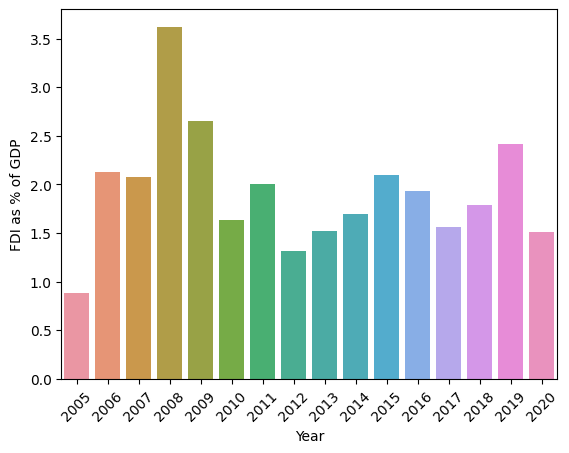

In [ ]:
sns.barplot(x='Year',y='FDI as % of GDP',data=data)
plt.xticks(rotation=45)
plt.show()

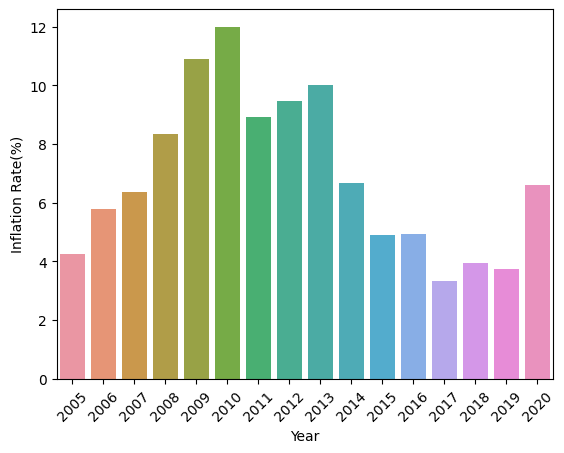

In [ ]:
sns.barplot(x='Year',y='Inflation Rate(%)',data=data)
plt.xticks(rotation=45)
plt.show()

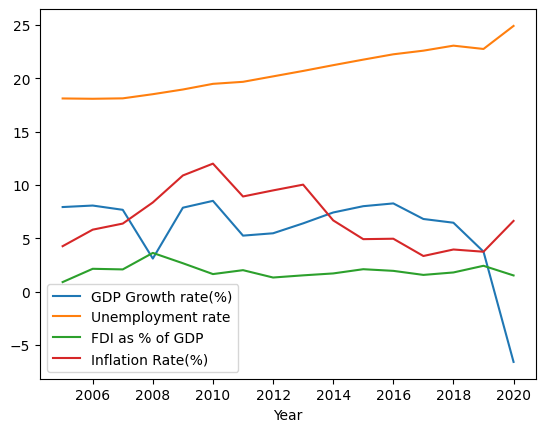

In [ ]:
data.plot(y=['GDP Growth rate(%)','Unemployment rate','FDI as % of GDP','Inflation Rate(%)'],x='Year',kind="line")
plt.show()

In [ ]:
correlation=data.corr()
correlation.iloc[1].reset_index()

,index,GDP Growth rate(%)
0,Year,-0.465597
1,GDP Growth rate(%),1.000000
2,Unemployment rate,-0.536763
3,FDI as % of GDP,-0.048398
4,Inflation Rate(%),0.024635


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
x1=data['Unemployment rate']
x2=data['FDI as % of GDP']
x3=data['Inflation Rate(%)']
y=data['GDP Growth rate(%)']
OLS= ols('y ~ x1+x2+x3',data).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2.248
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.135
Time:                        05:46:15   Log-Likelihood:                -39.558
No. Observations:                  16   AIC:                             87.12
Df Residuals:                      12   BIC:                             90.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1728     11.315      3.020      0.011       9.519      58.827
x1            -1.1777      0.456     -2.585      0.024      -2.170      -0.185
x2            -0.9714      1.409     -0.689      0.504      -4.041       2.098
x3            -0.3062      0.343     -0.892      0.390      -1.054       0.442
==============================================================================
Omnibus:                        7.797   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                4.554
Skew:                          -1.160   Prob(JB):                        0.103
Kurtosis:                       4.206   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# APPLY MACHINE LEARNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TASK 1

# Model Building

In [ ]:
gdpdata=pd.read_csv("/content/IndiaGDP.csv",header=None)

In [ ]:
labels=['Year','GDP']

In [ ]:
gdpdata.columns=labels

In [ ]:
gdpdata.head()

,Year,GDP
0,1960,3.653593e+10
1,1961,3.870910e+10
2,1962,4.159907e+10
3,1963,4.777600e+10
4,1964,5.572687e+10


In [ ]:
gdpdata['GDP'].describe()

count    5.800000e+01
mean     5.458303e+11
std      6.711517e+11
min      3.653593e+10
25%      9.741899e+10
50%      2.755000e+11
75%      5.770000e+11
max      2.600000e+12
Name: GDP, dtype: float64

<Axes: xlabel='Year'>

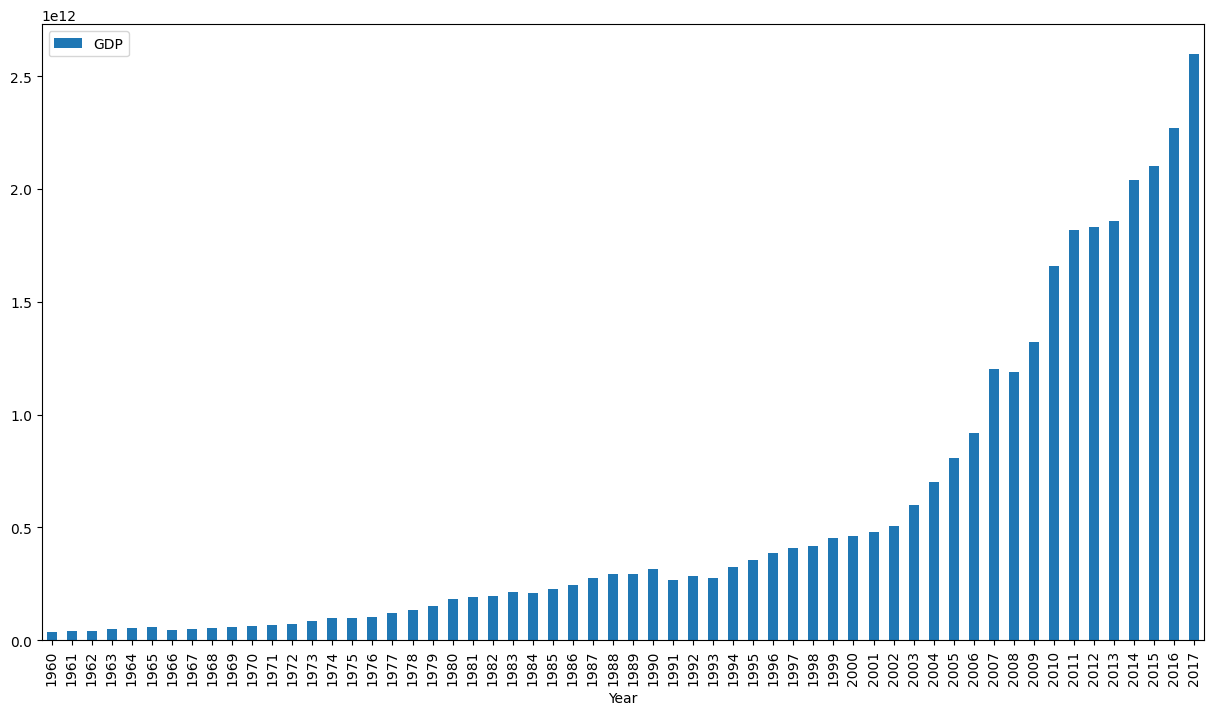

In [ ]:
gdpdata.plot.bar('Year','GDP',figsize=(15,8))

<Axes: xlabel='Year'>

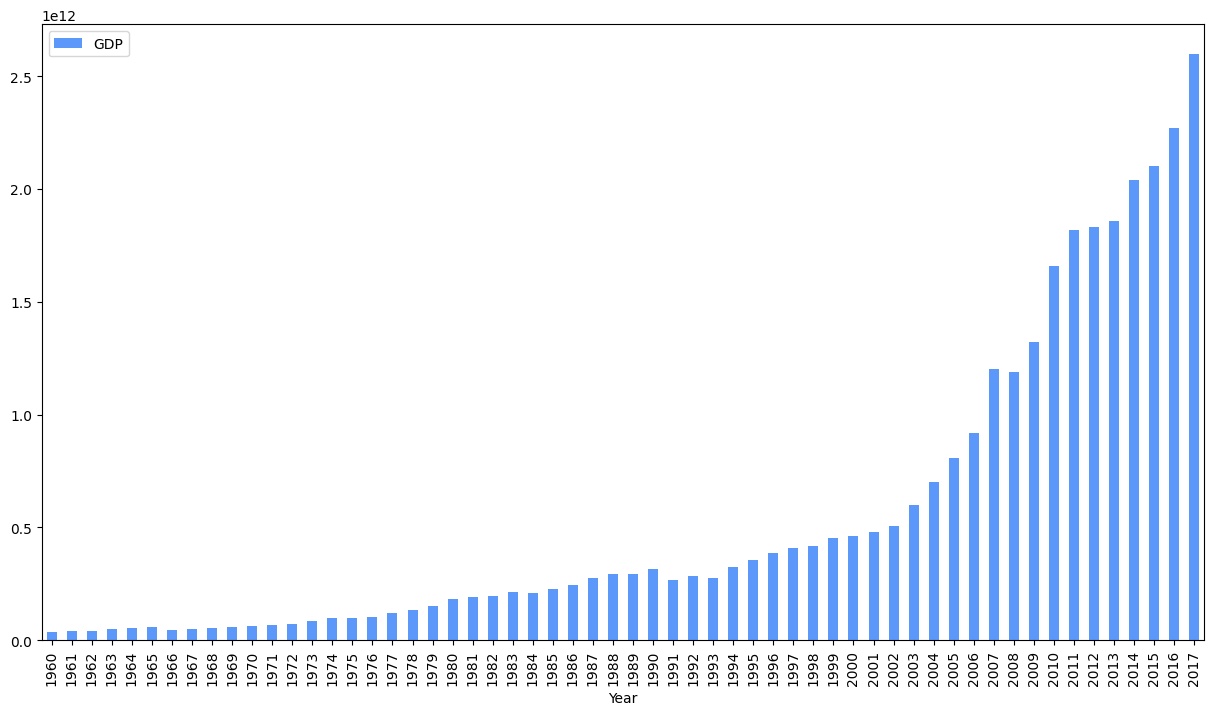

In [ ]:
gdpdata.plot('Year','GDP',kind='bar',figsize=(15,8),color='#5c98f9')

<Axes: xlabel='Year'>

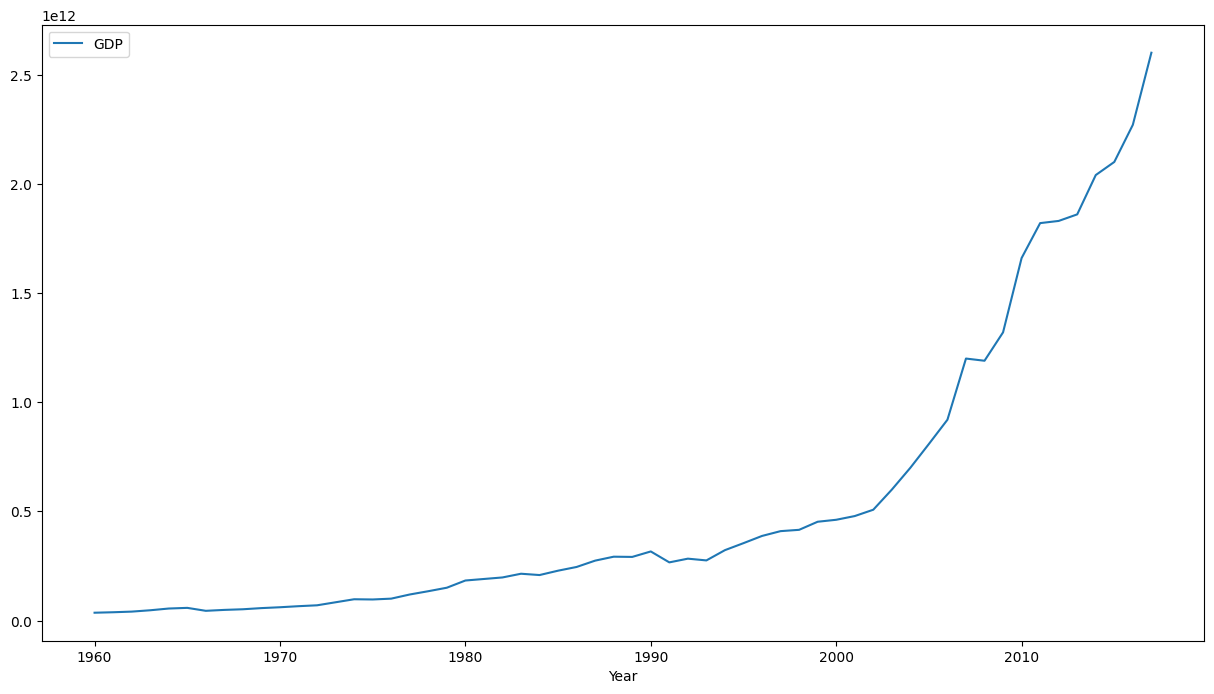

In [ ]:
gdpdata.plot('Year','GDP',kind='line',figsize=(15,8))

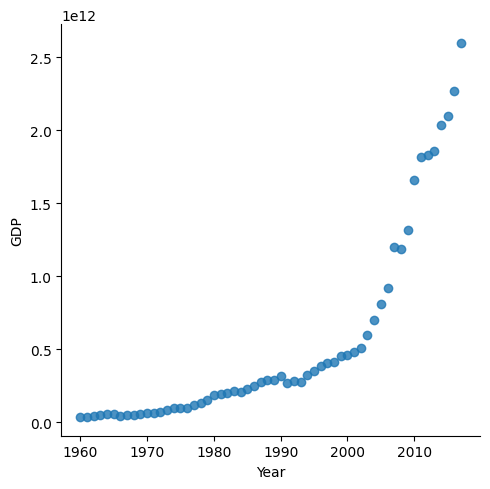

In [ ]:
sns.lmplot(x='Year',y='GDP',data=gdpdata,fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP'>

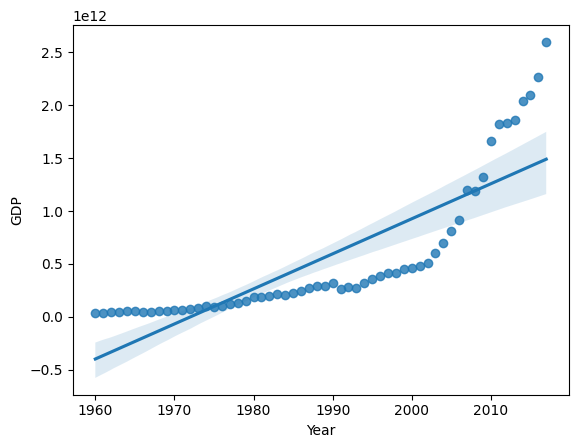

In [ ]:
sns.regplot(x='Year',y='GDP',data=gdpdata)

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(gdpdata)

In [ ]:
#:Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(train.iloc[:,:1],train.iloc[:,1:])

In [ ]:
ycap=model.predict(test.iloc[:,:1])
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.iloc[:,:1],ycap)
error

4.232401491533576e+23

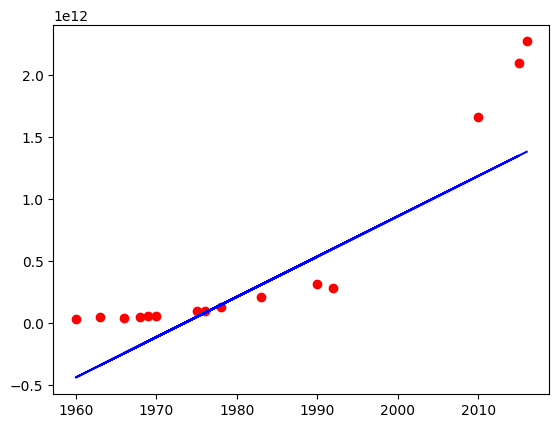

In [ ]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap,'b-')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor().fit(train.iloc[:,:1],train.iloc[:,1:])

In [ ]:
ycap2=model2.predict(test.iloc[:,:1])
error=mean_squared_error(test.iloc[:,:1],ycap2)
error

8.609460855333959e+23

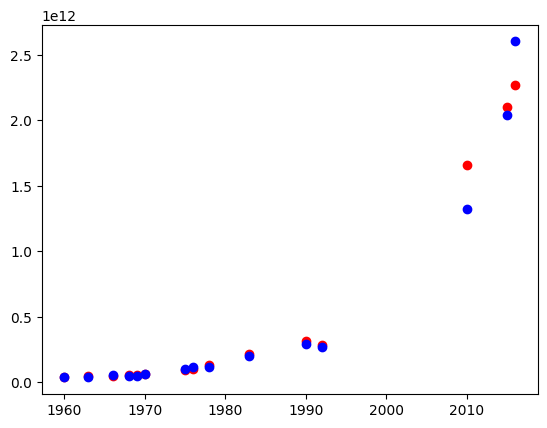

In [ ]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap2,'bo')
plt.show()

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
model3=Lasso(alpha=10).fit(train.iloc[:,:1],train.iloc[:,1:])

In [ ]:
ycap3=model3.predict(test.iloc[:,:1])
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.iloc[:,:1],ycap3)
error

4.23240149152687e+23

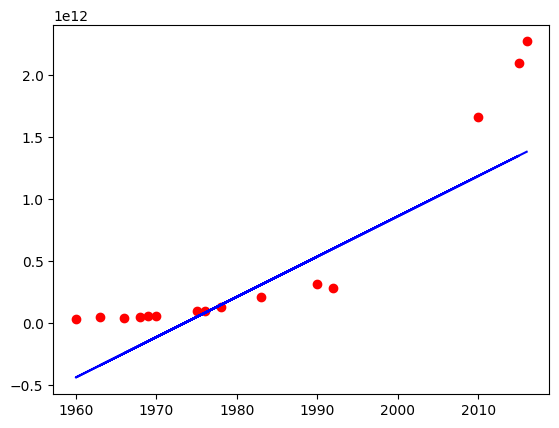

In [ ]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap3,'b-')
plt.show()

In [ ]:
model3.predict([[2050]])

array([2.4855849e+12])

## Considering Climate change


# Test and Train Split

In [ ]:
final_dataset = pd.read_csv("/content/final_dataset.csv")
final_dataset.head()

,pm2_5,Year,GDP_In_Billion_USD,mean_temp,humidity
0,364.61,2020,2667.69,24.97,84.500000
1,420.96,2020,2667.69,24.97,92.000000
2,463.68,2020,2667.69,24.97,87.000000
3,454.81,2020,2667.69,24.97,71.333333
4,448.14,2020,2667.69,24.97,86.833333


In [ ]:
x = final_dataset.drop('GDP_In_Billion_USD',axis=1)

In [ ]:
y = final_dataset['GDP_In_Billion_USD']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [ ]:
lr_1 = LinearRegression()
lr_1.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Calculates Error Rates

LR_prediction = lr_1.predict(x_test)
LR_prediction = pd.DataFrame(LR_prediction, columns=['Prediction_LR'])
LR_prediction = LR_prediction.astype(float)
y_test = y_test.reset_index(drop=True)
LR_prediction = pd.concat([LR_prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

LR_prediction['diff2'] = abs(LR_prediction['Prediction_LR'] - LR_prediction['GDP_In_Billion_USD'])
Sum_Absolute_Error_LR = np.sum(LR_prediction['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction['diff2'].size

In [ ]:
print('MAE is', float(Sum_Absolute_Error_LR))
print('MAE % is', (LR_prediction['diff2'].sum()/LR_prediction['GDP_In_Billion_USD'].sum()*100))
lr_1.score(x_test,y_test)

MAE is 31.34252883313781
MAE % is 0.9148808576986233


array([10742.24106269])